In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns


In [28]:
# Import the data
df = pd.read_csv("../data/children_per_woman_total_fertility.csv")  #..(relative path, goes to the parent directory) vs. C:Users (absolute path)

## Babies per woman (total fertility rate)

#### 1800 - 2100 (prediction)

Note: The total fertility rate was calculated as an average of all countries weighted by their population sizes. The proper way to calculate it would be to account for the number of women in fertile ages and their birth patterns, but this method comes very close to the official UN world fertility rate with a much simpler method.

Source: Gapminder. Link: https://www.gapminder.org/data/documentation/gd008/

In [29]:
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.10,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02
198,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
199,South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
200,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,2.59,2.57,2.56,2.54,2.53,2.51,2.50,2.48,2.46,2.46


## Plotting

In [62]:
# Getting the top 3 and bottom 3 countries for the year 2023
sorted_df = df.sort_values(by='2023', ascending=False)
top_3 = sorted_df.head(3)
bottom_3 = sorted_df.tail(3)
bottom_10 = sorted_df.tail(10)

# Selecting Korea, Japan, and China
specific_countries = df[df['country'].isin(['South Korea', 'Japan', 'China', 'United Kingdom'])]

In [63]:
# Concatenate the top 3 and bottom 3 into a single DataFrame
combined = pd.concat([top_3, bottom_3, specific_countries])

In [64]:
bottom_10

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
177,Thailand,6.35,6.35,6.35,6.35,6.35,6.35,6.35,6.35,6.35,...,1.76,1.76,1.76,1.76,1.77,1.77,1.77,1.77,1.77,1.77
105,St. Lucia,5.53,5.53,5.53,5.53,5.53,5.53,5.53,5.53,5.53,...,1.75,1.75,1.75,1.76,1.76,1.76,1.76,1.76,1.77,1.77
99,South Korea,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,1.77,1.77,1.77,1.78,1.78,1.78,1.78,1.78,1.78,1.78
44,Cyprus,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.03,...,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77,1.77,1.77
71,Greece,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.03,...,1.75,1.76,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77
185,Taiwan,5.83,5.83,5.83,5.83,5.83,5.83,5.83,5.83,5.83,...,1.74,1.74,1.74,1.75,1.75,1.75,1.75,1.75,1.76,1.76
145,Poland,6.28,6.26,6.25,6.23,6.22,6.20,6.19,6.17,6.16,...,1.75,1.75,1.75,1.76,1.76,1.76,1.76,1.76,1.76,1.76
160,Singapore,5.47,5.47,5.46,5.46,5.46,5.45,5.45,5.44,5.44,...,1.44,1.44,1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45
113,Moldova,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,...,1.75,1.75,1.75,1.75,1.75,1.76,1.76,1.76,1.76,1.76
148,Portugal,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,...,1.75,1.75,1.75,1.75,1.75,1.76,1.76,1.76,1.76,1.76


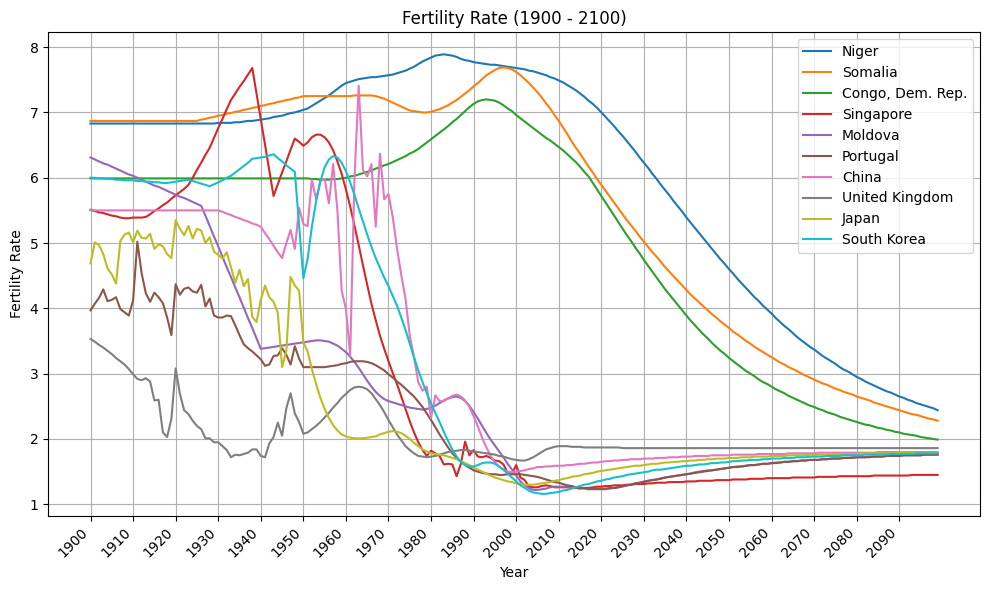

In [65]:
# Plotting
plt.figure(figsize=(10, 6))

for i, row in combined.iterrows():
    plt.plot(columns, row[columns], label=row['country'])

plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate (1900 - 2100)')
plt.legend(loc='upper right')

# Set xticks every 10 years
plt.xticks([str(year) for year in range(1900, 2100, 10)], rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
# Selecting years 1950 to 2023
selected_years = [str(year) for year in range(1950, 2024)]

# Selecting specific countries: 'South Korea', 'Japan', 'China', 'United Kingdom'
selected_countries = combined[combined['country'].isin(['South Korea', 'Japan', 'China', 'United Kingdom'])]


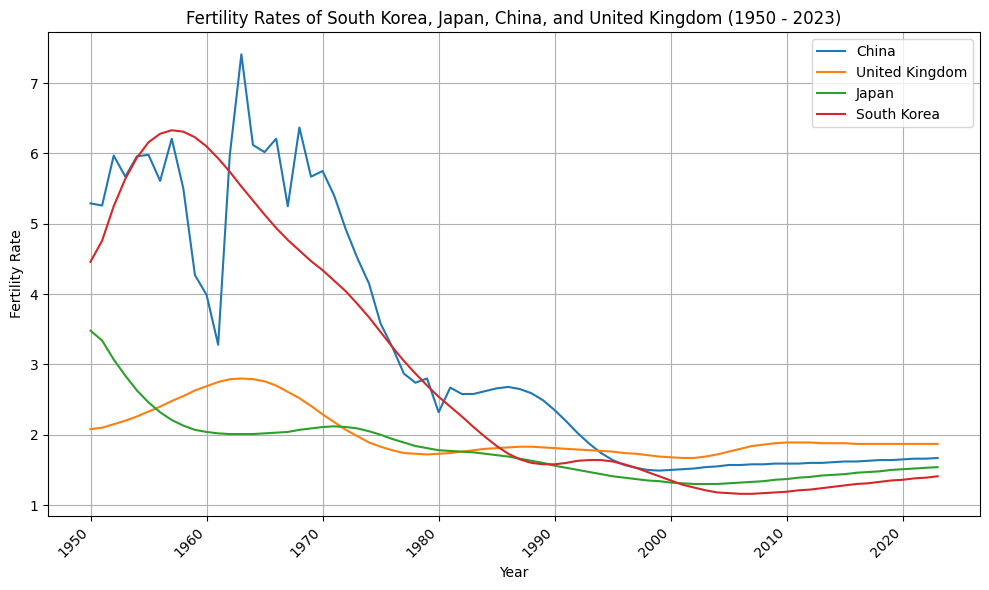

In [67]:
# Plotting
plt.figure(figsize=(10, 6))

for i, row in selected_countries.iterrows():
    plt.plot(selected_years, row[selected_years], label=row['country'])

plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rates of South Korea, Japan, China, and United Kingdom (1950 - 2023)')
plt.legend(loc='upper right')

# Set xticks every 10 years
plt.xticks([str(year) for year in range(1950, 2023, 10)], rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()